In [232]:
%matplotlib inline


# Pass heat maps


In [11]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import pandas as pd

In [12]:

parser = Sbopen()
df_match = parser.match(competition_id=72, season_id=30)
team = "England Women's"
match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
no_games = len(match_ids)

In [13]:
#declare an empty dataframe
danger_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game 
    df = parser.event(idx)[0]
    for period in [1, 2]:
        #keep only accurate passes by England that were not set pieces in this period
        mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull()) 
       
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
       
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
        
        shots = df.loc[mask_shot, ["minute", "second"]]
        
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15  
        
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert to seconds
        pass_times = passes['minute']*60+passes['second']
       
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())
        
        #keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
      
        danger_passes = pd.concat([danger_passes, danger_passes_period])
    

In [14]:
print(passes)

         x     y  end_x  end_y  minute  second             player_name
1663  10.6  46.5   15.9   58.6      46      21  Carly Mitchell Telford
1667  14.9  58.1   34.9   55.4      46      23      Stephanie Houghton
1670  30.6  58.1   24.1   76.6      46      26              Jill Scott
1673  32.1  76.7   42.9   76.0      46      29             Lucy Bronze
1684  52.1  75.0   65.1   73.0      46      44             Rachel Daly
...    ...   ...    ...    ...     ...     ...                     ...
3037  25.8  69.7   16.8   70.9      94      17              Jade Moore
3074   9.6  72.5   74.0   65.5      95      27      Stephanie Houghton
3082  76.9  71.1   79.3   64.9      95      38         Francesca Kirby
3084  79.3  64.9   71.8   67.8      95      39              Jill Scott
3087  74.1  67.3   69.9   53.5      95      40           Nikita Parris

[133 rows x 7 columns]


## Plotting location of danger passes


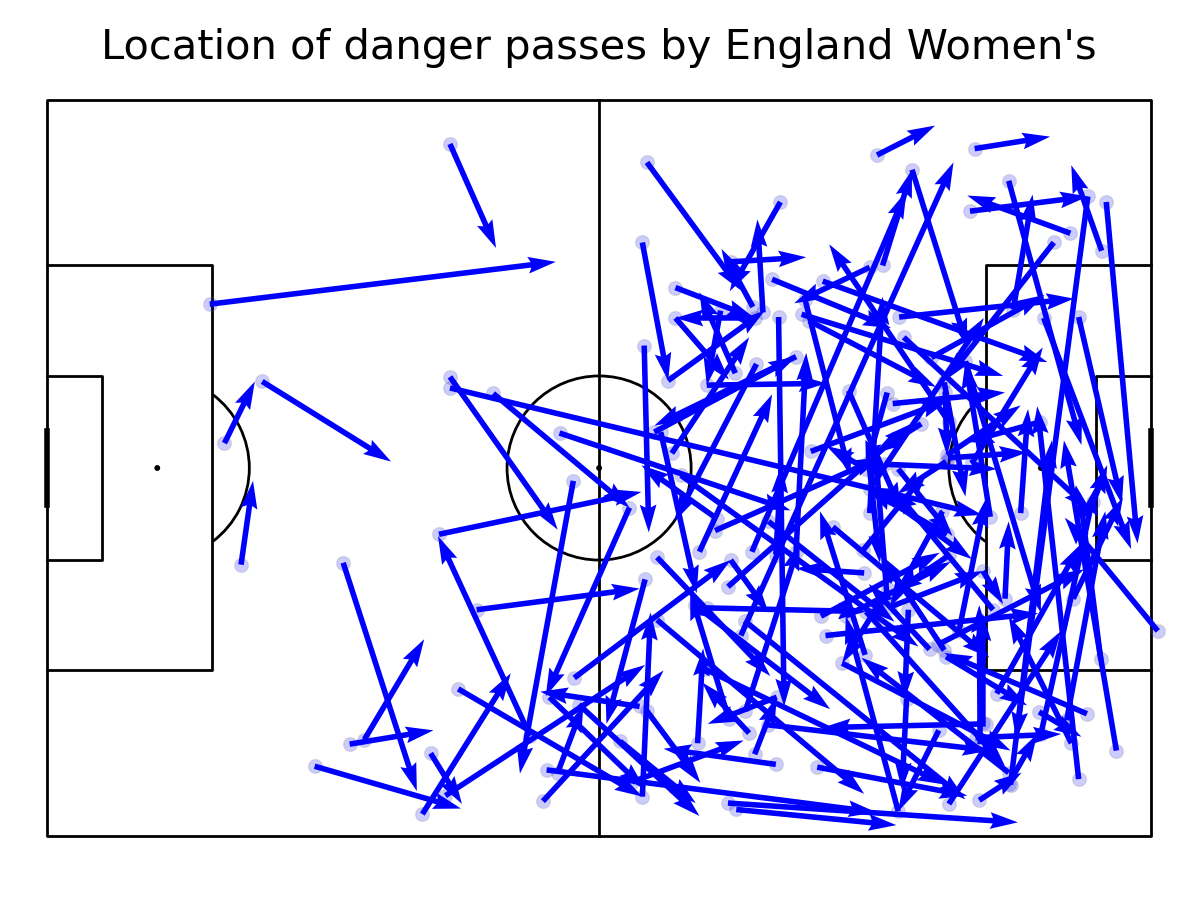

In [15]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])

pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'])

fig.suptitle('Location of danger passes by ' + team, fontsize = 30)
plt.show()

## Making a heat map


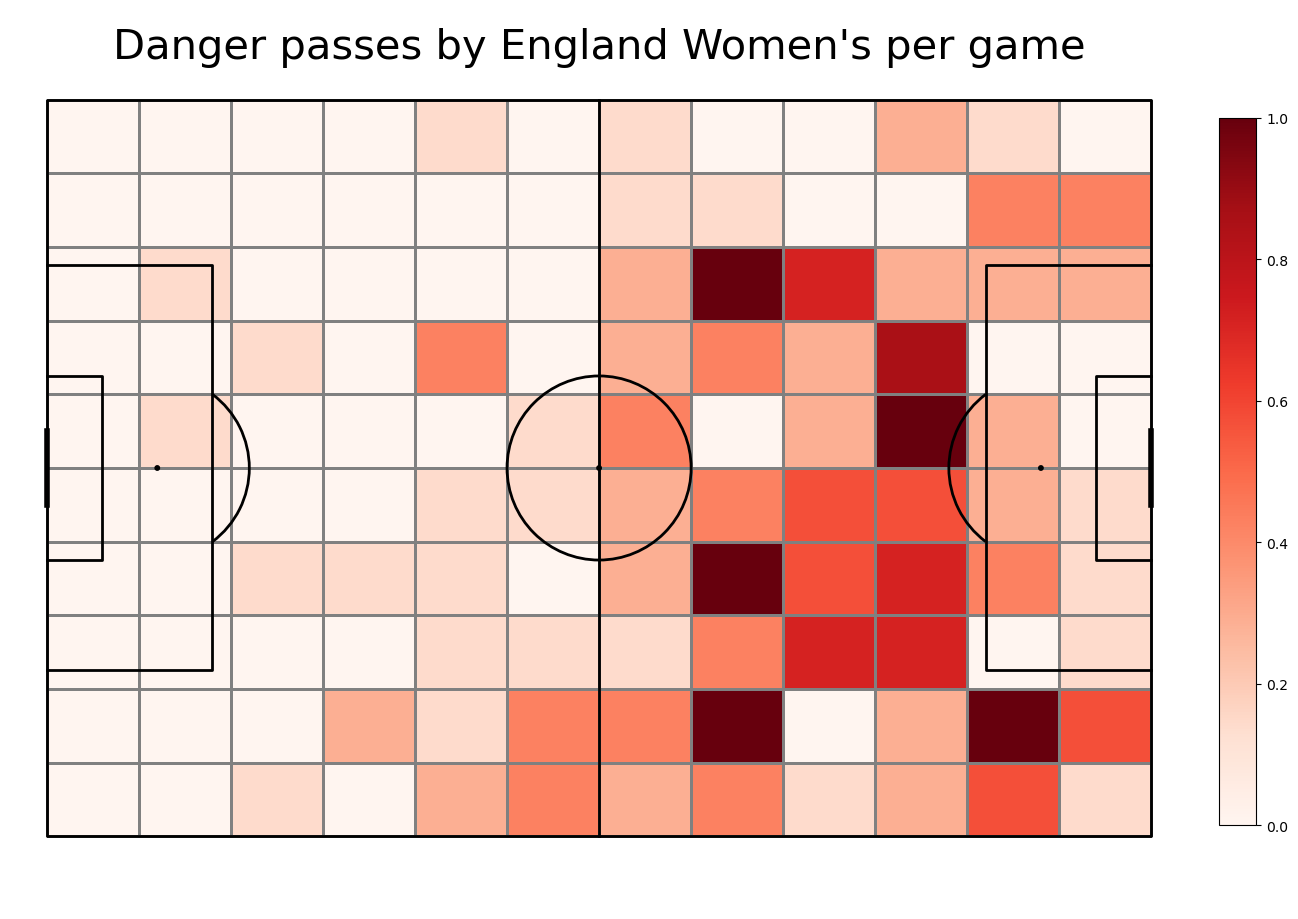

"England Women's"

In [16]:

pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(12, 10), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + team + " per game", fontsize = 30)
plt.show()
team

## Making a diagram of most involved players



734            Ellen White
939     Stephanie Houghton
942             Jill Scott
945          Nikita Parris
949             Jill Scott
               ...        
2776       Francesca Kirby
2779           Rachel Daly
3082       Francesca Kirby
3084            Jill Scott
3087         Nikita Parris
Name: player_name, Length: 176, dtype: object


Text(0, 0.5, 'Number of danger passes per game')

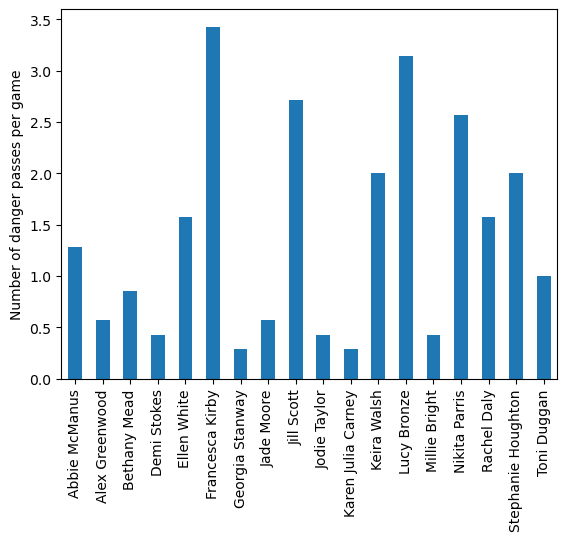

In [17]:
#keep only surnames
danger_passes["player_name"] #= danger_passes["player_name"].apply(lambda x: str(x).split()[-1])
print(danger_passes["player_name"])
#count passes by player and normalize them
pass_count = danger_passes.groupby(["player_name"]).x.count()/no_games

#make a histogram
ax = pass_count.plot.bar(pass_count)
#make legend
ax.set_xlabel("")
ax.set_ylabel("Number of danger passes per game")
#plt.show()

In [18]:
for k,v in pass_count.items():
    if v > 3.3:        
        print(k)

Francesca Kirby


In [19]:

danger_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game 
    df = parser.event(idx)[0]
    for period in [1, 2]:
    
        mask_pass = (df.team_name == team) & (df.type_name == "Pass")  &  (df.player_name == k)  & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull())       
        
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        
      
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)

        shots = df.loc[mask_shot, ["minute", "second"]]
 
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15  

        shot_start = shot_times - shot_window

        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
    
        pass_times = passes['minute']*60+passes['second']
       
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())
        
        
        danger_passes_period = passes.loc[pass_to_shot]
        
        danger_passes = pd.concat([danger_passes, danger_passes_period])
    

In [20]:
print(passes)

Empty DataFrame
Columns: [x, y, end_x, end_y, minute, second, player_name]
Index: []


In [21]:
danger_passes

,x,y,end_x,end_y,minute,second,player_name
616,92.5,40.1,98.4,47.4,12,3,Toni Duggan
771,77.8,23.1,77.2,13.0,17,18,Toni Duggan
778,73.2,22.9,71.7,31.0,17,21,Toni Duggan
1792,102.0,67.8,84.3,68.2,47,51,Toni Duggan
2231,97.6,31.7,97.8,38.6,61,2,Toni Duggan
1247,94.0,7.6,100.0,26.8,28,41,Toni Duggan
1839,111.2,14.5,100.0,10.4,44,57,Toni Duggan


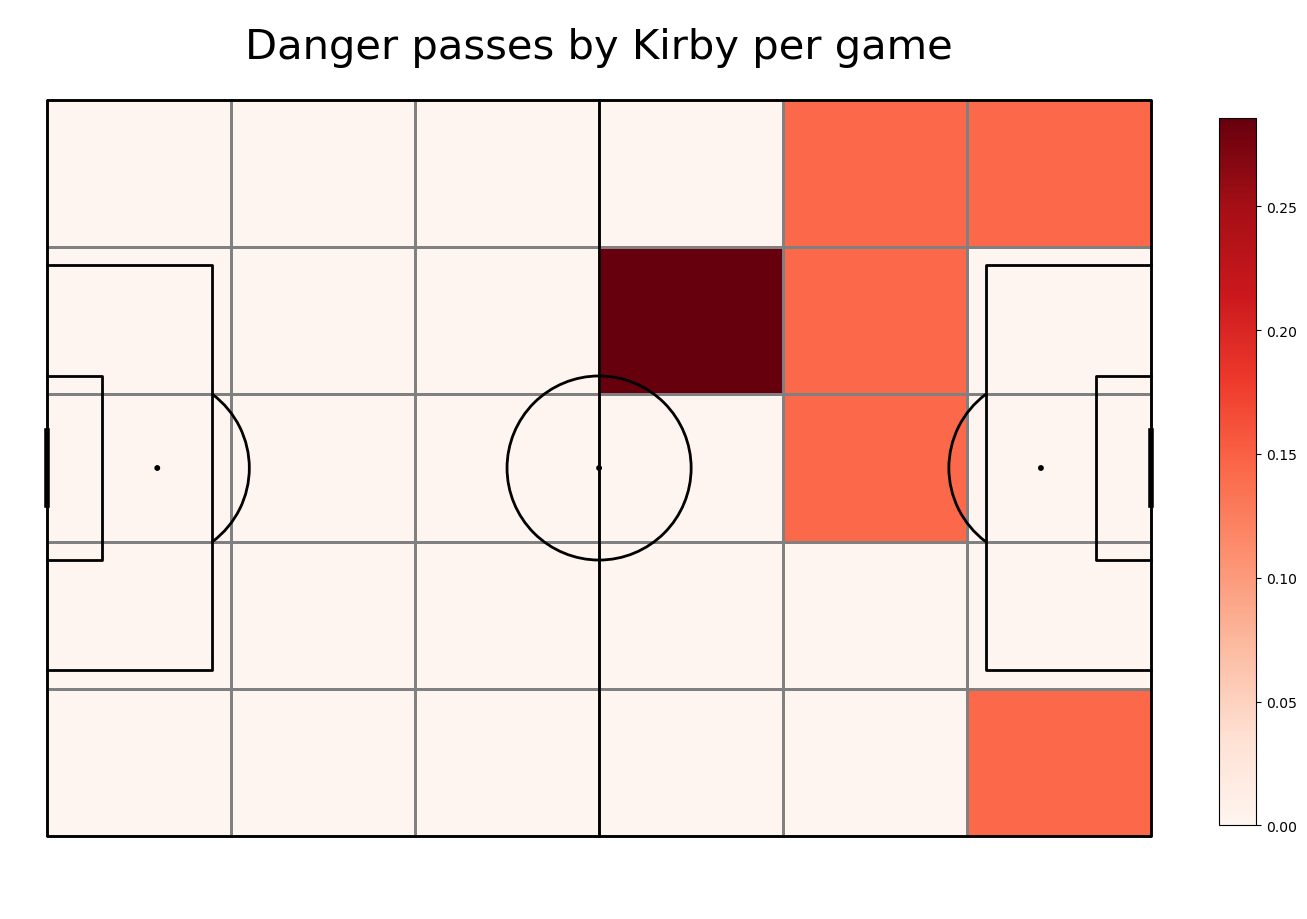

NameError: name 'name' is not defined

In [22]:
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6,5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games

pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + 'Kirby' + " per game", fontsize = 30)
plt.show()
name()